# Heteroskedasticity

### Introduction

Heteroskedasticity is one of the fundamental violations of the classical linear regression model assumptions. As econometricians, understanding its nature, consequences, and remedies is crucial for producing reliable empirical results. This notebook provides a comprehensive treatment of heteroskedasticity from both theoretical and practical perspectives.

### 1. Definition and Mathematical Framework

#### 1.1 The Classical Linear Regression Model

Consider the standard linear regression model:

$$
Y_i = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \dots + \beta_k X_{ki} + u_i
$$

where:

- $Y_i$ is the dependent variable for observation $i$  
- $X_{ji}$ are the independent variables  
- $\beta_j$ are the parameters to be estimated  
- $u_i$ is the error term

#### 1.2 Homoskedasticity Assumption

Under the classical assumptions, we require:

$$
\text{Var}(u_i \mid X_i) = \sigma^2 \quad \text{for all } i
$$

This means the variance of the error term is constant across all observations, conditional on the explanatory variables.

#### 1.3 Heteroskedasticity Definition

Heteroskedasticity occurs when:

$$
\text{Var}(u_i \mid X_i) = \sigma_i^2 \quad \text{where } \sigma_i^2 \neq \sigma_j^2 \text{ for some } i \neq j
$$

In other words, the variance of the error term varies across observations.

### 2. Types of Heteroskedasticity

#### 2.1 Pure Heteroskedasticity
This occurs when heteroskedasticity is not correlated with any of the explanatory variables in the model. It's relatively rare in economic applications.

### 2.2 Conditional Heteroskedasticity

This is the most common form in econometrics, where:

$$
\text{Var}(u_i \mid X_i) = f(X_i)
$$

The variance depends on the values of the explanatory variables.

### 2.3 Common Functional Forms

Several functional forms are commonly observed:

**Linear Form:**

$$
\sigma_i^2 = \alpha_0 + \alpha_1 X_i
$$

**Multiplicative Form:**

$$
\sigma_i^2 = \sigma^2 \exp(\alpha_0 + \alpha_1 X_i)
$$

**Power Form:**

$$
\sigma_i^2 = \sigma^2 X_i^{\alpha}
$$


### 3. Sources and Causes of Heteroskedasticity

#### 3.1 Scale Effects
In cross-sectional data, larger entities often exhibit greater variability. For example:

Large firms may have more volatile profits than small firms
High-income households may show greater consumption variability

#### 3.2 Learning and Improvement

Over time, agents may become more efficient, reducing error variance:

$$
\sigma_t^2 = \sigma^2 e^{-\lambda t}
$$

#### 3.3 Outliers and Measurement Error

Heteroskedasticity can arise from:

- Data collection procedures varying across observations  
- Different measurement precision for different groups  
- Presence of outliers

#### 3.4 Model Misspecification

Heteroskedasticity can also result from:

- Omitted variables  
- Incorrect functional form  
- Non-linear relationships approximated by linear models


### 4. Consequences of Heteroskedasticity

#### 4.1 OLS Estimator Properties

Under heteroskedasticity, the OLS estimator:

- **Remains unbiased**:

$$
\mathbb{E}[\hat{\beta}_{\text{OLS}} \mid X] = \beta
$$

- **But becomes inefficient**:

The variance-covariance matrix becomes:

$$
\text{Var}(\hat{\beta}_{\text{OLS}} \mid X) = (X'X)^{-1} X' \Omega X (X'X)^{-1}
$$

where:

$$
\Omega = \text{diag}(\sigma_1^2, \sigma_2^2, \ldots, \sigma_n^2)
$$

### 4.2 Standard Error Bias

The usual OLS standard errors are biased:

$$
\hat{\text{Var}}(\hat{\beta}_{\text{OLS}}) = s^2 (X'X)^{-1}
$$

This estimator is inconsistent under heteroskedasticity, leading to:

- Invalid *t*-tests and *F*-tests  
- Incorrect confidence intervals  
- Misleading statistical inference

### 4.3 Efficiency Loss

OLS is no longer the **Best Linear Unbiased Estimator (BLUE)**.  
The **Generalized Least Squares (GLS)** estimator is more efficient:

$$
\hat{\beta}_{\text{GLS}} = (X' \Omega^{-1} X)^{-1} X' \Omega^{-1} Y
$$

with variance:

$$
\text{Var}(\hat{\beta}_{\text{GLS}} \mid X) = (X' \Omega^{-1} X)^{-1}
$$

### 5. Detection of Heteroskedasticity

#### 5.1 Graphical Methods

**Residual Plots:**

- Plot residuals against fitted values: $\hat{u}_i$ vs $\hat{Y}_i$  
- Plot residuals against explanatory variables: $\hat{u}_i$ vs $X_i$  
- Look for patterns indicating non-constant variance

#### 5.2 Formal Tests

##### 5.2.1 Breusch-Pagan Test

- **Null Hypothesis:** $H_0: \sigma_i^2 = \sigma^2$ (homoskedasticity)

**Test Procedure:**

1. Run OLS regression and obtain residuals $\hat{u}_i$
2. Compute $\hat{u}_i^2$
3. Regress $\hat{u}_i^2$ on explanatory variables:

$$
\hat{u}_i^2 = \alpha_0 + \alpha_1 X_{1i} + \ldots + \alpha_k X_{ki} + v_i
$$

4. Compute test statistic: $LM = nR^2$, where $R^2$ is from step 3  
5. Under $H_0$: $LM \sim \chi^2(k)$

##### 5.2.2 White Test

**General Form:**

Regress $\hat{u}_i^2$ on all explanatory variables, their squares, and cross-products:

$$
\hat{u}_i^2 = \alpha_0 + \sum_{j=1}^k \alpha_j X_{ji} + \sum_{j=1}^k \alpha_{jj} X_{ji}^2 + \sum_{j<l} \alpha_{jl} X_{ji}X_{li} + v_i
$$

**Test Statistic:**

$$
LM = nR^2 \sim \chi^2(\text{df}) \quad \text{under } H_0
$$

##### 5.2.3 Goldfeld-Quandt Test

**Procedure:**

1. Order observations by suspected heteroskedastic variable  
2. Split sample into two groups (excluding middle observations)  
3. Run separate regressions on each group  
4. Compute test statistic:

$$
F = \frac{SSR_2 / df_2}{SSR_1 / df_1}
$$


### 6. Remedial Measures

#### 6.1 Robust Standard Errors

**White's Heteroskedasticity-Consistent Estimator**:

$$
\hat{\text{Var}}(\hat{\beta}_{HC}) = (X'X)^{-1}\left(\sum_{i=1}^n \hat{u}_i^2 x_i x_i'\right)(X'X)^{-1}
$$

This provides consistent standard errors without requiring knowledge of the heteroskedasticity form.

#### 6.2 Weighted Least Squares (WLS)

When the form of heteroskedasticity is known:

$$
\text{Var}(u_i \mid X_i) = \sigma^2 h_i
$$

Transform the model by dividing by $\sqrt{h_i}$:

$$
\frac{Y_i}{\sqrt{h_i}} = \frac{\beta_0}{\sqrt{h_i}} + \beta_1 \frac{X_{1i}}{\sqrt{h_i}} + \ldots + \frac{u_i}{\sqrt{h_i}}
$$

Now the transformed error term has constant variance $\sigma^2$.

#### 6.3 Feasible Generalized Least Squares (FGLS)

When the heteroskedasticity form is unknown:

1. Run OLS and obtain residuals $\hat{u}_i$  
2. Model the variance:  
   $$
   \ln(\hat{u}_i^2) = \alpha_0 + \alpha_1 Z_i + v_i
   $$
3. Predict variances:  
   $$
   \hat{\sigma}_i^2 = \exp(\hat{\alpha}_0 + \hat{\alpha}_1 Z_i)
   $$
4. Apply WLS with weights:  
   $$
   w_i = \frac{1}{\hat{\sigma}_i}
   $$

#### 6.4 Box-Cox Transformation

For certain types of heteroskedasticity, transform the dependent variable:

$$
Y_i^{(\lambda)} = 
\begin{cases}
\frac{Y_i^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\
\ln(Y_i) & \text{if } \lambda = 0
\end{cases}
$$

### 7. Practical Example: Income and Consumption

Consider a consumption function where heteroskedasticity might arise due to income differences:

$$
C_i = \beta_0 + \beta_1 Y_i + u_i
$$

where:
- $C_i$ = consumption of household $i$  
- $Y_i$ = income of household $i$

**Expected Pattern:** Higher-income households may exhibit greater consumption variability.

**Variance Function:**  
$$
\text{Var}(u_i \mid Y_i) = \sigma^2 Y_i
$$

**WLS Solution:** Use weights:  
$$
w_i = \frac{1}{Y_i}
$$

### 8. Advanced Topics

#### 8.1 Autoregressive Conditional Heteroskedasticity (ARCH)

In time series, volatility clustering leads to ARCH effects:

$$
\sigma_t^2 = \alpha_0 + \alpha_1 u_{t-1}^2 + \ldots + \alpha_q u_{t-q}^2
$$

#### 8.2 Generalized ARCH (GARCH)

$$
\sigma_t^2 = \alpha_0 + \sum_{i=1}^q \alpha_i u_{t-i}^2 + \sum_{j=1}^p \beta_j \sigma_{t-j}^2
$$

#### 8.3 Clustered Standard Errors

For panel data or grouped observations:

$$
\hat{\text{Var}}(\hat{\beta}_{\text{cluster}}) = (X'X)^{-1} \left( \sum_{g=1}^G X_g' \hat{u}_g \hat{u}_g' X_g \right)(X'X)^{-1}
$$


### 9. Conclusion

Heteroskedasticity is a pervasive issue in econometric analysis that requires careful attention. While it doesn't bias OLS coefficient estimates, it invalidates standard inference procedures. Modern econometric practice emphasizes:

1. **Diagnostic Testing:** Always test for heteroskedasticity  
2. **Robust Inference:** Use heteroskedasticity-robust standard errors as default  
3. **Efficient Estimation:** Consider GLS/FGLS when appropriate  
4. **Model Specification:** Address underlying causes through better modeling

Understanding and properly addressing heteroskedasticity is essential for credible empirical research in economics and related fields.

## Emperical Example

We want to check the presence of Heteroskedasticity when studying the association between food expenditure and income.

First five rows of the dataset:
   food_exp  income
0    115.22    3.69
1    135.98    4.39
2    119.34    4.75
3    114.96    6.03
4    187.05   12.47


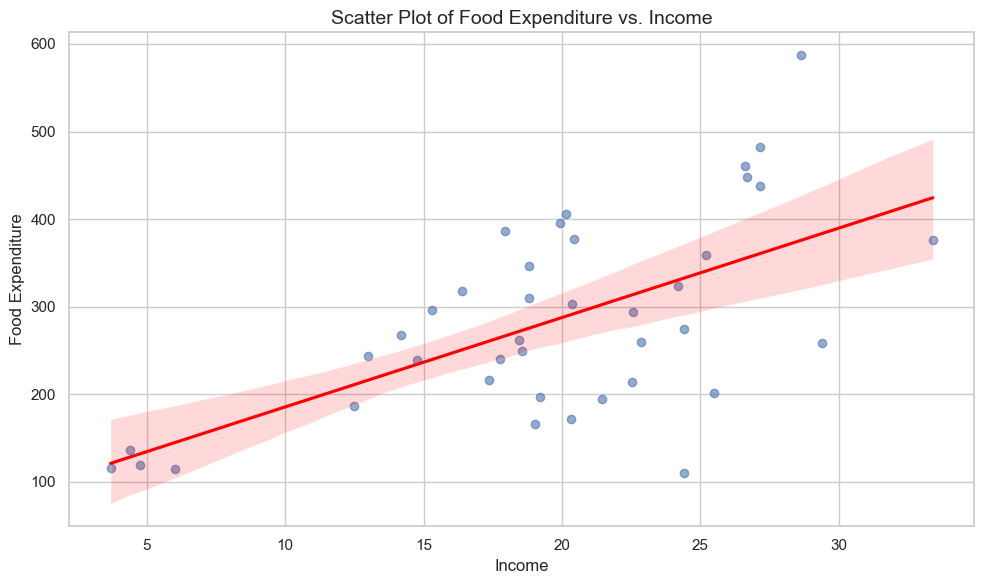


Linear Regression Results:
                            OLS Regression Results                            
Dep. Variable:               food_exp   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     23.79
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           1.95e-05
Time:                        16:12:14   Log-Likelihood:                -235.51
No. Observations:                  40   AIC:                             475.0
Df Residuals:                      38   BIC:                             478.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.4160   

In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Load the Stata dataset
file_path = "D:/Stata-Tutorial/stata/food.dta"
df = pd.read_stata(file_path)

# Display the first few rows of the dataset
print("First five rows of the dataset:")
print(df[['food_exp', 'income']].head())

# Drop any missing values for analysis
df_clean = df[['food_exp', 'income']].dropna()

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='income', y='food_exp', data=df_clean, line_kws={"color": "red"}, scatter_kws={"alpha": 0.6})
plt.title("Scatter Plot of Food Expenditure vs. Income", fontsize=14)
plt.xlabel("Income")
plt.ylabel("Food Expenditure")
plt.tight_layout()
plt.show()

# OLS Regression
X = sm.add_constant(df_clean['income'])  # add constant (intercept)
y = df_clean['food_exp']
model = sm.OLS(y, X).fit()

# Print regression summary
print("\nLinear Regression Results:")
print(model.summary())

### Detecting heteroskedasticity

Heteroskedasticity can be identified using a range of graphical diagnostics and formal statistical tests. This section presents and discusses several commonly employed methods for detecting the presence of heteroskedasticity in regression models.

#### Residual Plots

To detect heteroskedasticity using a residual plot, we plot the residuals from the regression model against the fitted (predicted) values of the dependent variable. If the spread of residuals increases or decreases systematically across the range of fitted values (i.e., a funnel shape), it suggests heteroskedasticity.

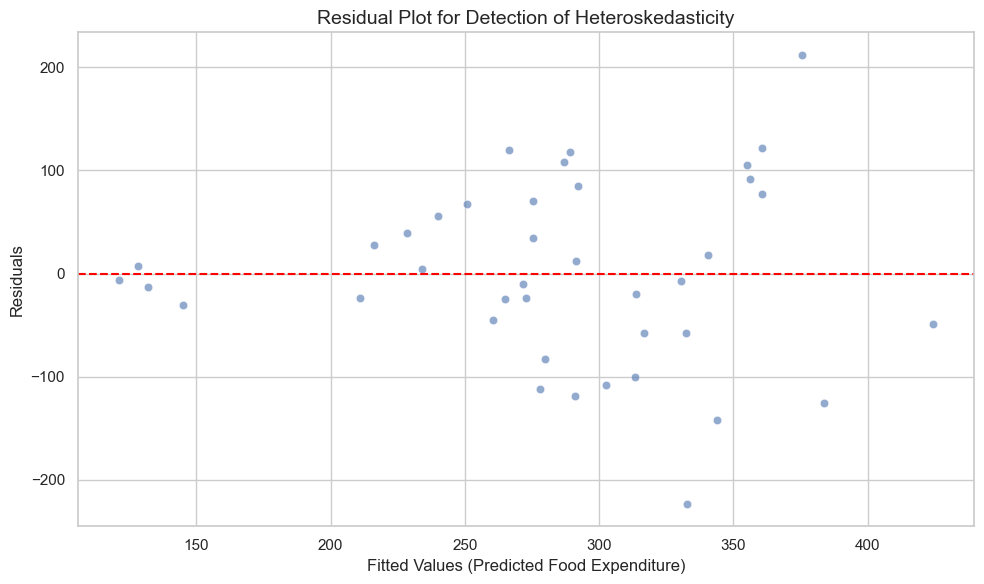

In [11]:
# Predict fitted values and calculate residuals
df_clean['fitted'] = model.fittedvalues
df_clean['residuals'] = model.resid

# Residual plot: residuals vs. fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fitted', y='residuals', data=df_clean, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot for Detection of Heteroskedasticity', fontsize=14)
plt.xlabel('Fitted Values (Predicted Food Expenditure)')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

The residual plot suggests a tendency for residual magnitudes to increase with higher levels of income, indicating a potential violation of the homoskedasticity assumption.

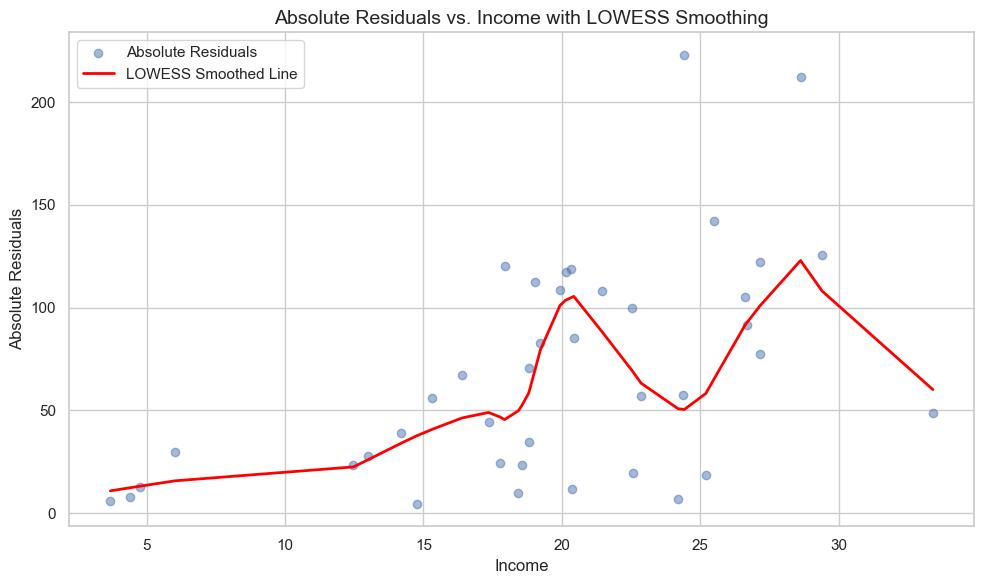

In [12]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Step 1: Create absolute residuals
df_clean['abs_e'] = np.abs(df_clean['residuals'])

# Step 2: Apply LOWESS smoothing
lowess = sm.nonparametric.lowess
lowess_result = lowess(df_clean['abs_e'], df_clean['income'], frac=0.3)  # frac controls smoothing level

# Step 3: Plot the absolute residuals and LOWESS smoother
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['income'], df_clean['abs_e'], alpha=0.5, label='Absolute Residuals')
plt.plot(lowess_result[:, 0], lowess_result[:, 1], color='red', linewidth=2, label='LOWESS Smoothed Line')
plt.title('Absolute Residuals vs. Income with LOWESS Smoothing', fontsize=14)
plt.xlabel('Income')
plt.ylabel('Absolute Residuals')
plt.legend()
plt.tight_layout()
plt.show()

The residual plot reveals a general pattern wherein the magnitude of residuals increases with rising income levels, peaking around an income value of 28. Notably, the residual corresponding to the highest income observation is comparatively small, which contributes to a downward trend in the locally weighted smoothed line at the upper end of the income distribution.

### Langrange Multiplier Tests

Numerous statistical tests have been developed to evaluate the null hypothesis of homoskedasticity. Among these, two widely used and computationally straightforward methods—both based on the Lagrange Multiplier (LM) principle—are particularly notable. The first, commonly known as the Breusch-Pagan test (referred to in some software as the Breusch-Godfrey test), and the second, proposed by White, offer robust diagnostics for detecting heteroskedasticity in regression models.

### Breusch-Pagan Test: Mathematical Hypotheses

We start with the standard linear regression model:

$$
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_k x_{ik} + \varepsilon_i,
$$

where the error term \( \varepsilon_i \) is assumed to have constant variance \( \sigma^2 \) under the classical OLS assumptions.

The Breusch-Pagan test evaluates whether the **variance of the error term** \( \text{Var}(\varepsilon_i) \) depends on the explanatory variables:

#### **Null Hypothesis (H₀): Homoskedasticity**
$$
\text{Var}(\varepsilon_i) = \sigma^2
$$

#### **Alternative Hypothesis (H₁): Heteroskedasticity**
$$
\text{Var}(\varepsilon_i) = \sigma^2 h(z_i), \quad \text{where } h(z_i) = 1 + \alpha_1 z_{i1} + \alpha_2 z_{i2} + \dots + \alpha_m z_{im}
$$

That is, under \( H_1 \), the error variance is a function of the explanatory variables \( z_i \), usually chosen as the regressors from the original model (e.g., `income`).

The Breusch-Pagan test proceeds by regressing the squared residuals from the original OLS regression on the explanatory variables, and testing whether the coefficients \( \alpha_j \) are jointly equal to zero:

$$
H_0: \alpha_1 = \alpha_2 = \dots = \alpha_m = 0
$$

A significant test statistic (low p-value) provides evidence against homoskedasticity.

In [13]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform Breusch-Pagan test
# Inputs: residuals, exogenous variables (excluding constant)
bp_test = het_breuschpagan(model.resid, model.model.exog)

# Unpack test results
bp_stat, bp_pval, f_stat, f_pval = bp_test

print("Breusch-Pagan Test Results:")
print(f"LM Statistic: {bp_stat:.4f}")
print(f"p-value (LM): {bp_pval:.4f}")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value (F): {f_pval:.4f}")

# Interpretation
if bp_pval < 0.05:
    print("\nConclusion: Reject the null hypothesis. Evidence of heteroskedasticity.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. No strong evidence of heteroskedasticity.")

Breusch-Pagan Test Results:
LM Statistic: 7.3844
p-value (LM): 0.0066
F-statistic: 8.6035
p-value (F): 0.0057

Conclusion: Reject the null hypothesis. Evidence of heteroskedasticity.


#### Goldfeld–Quandt Test: Mathematical Hypotheses

The Goldfeld–Quandt (GQ) test is used to detect heteroskedasticity by checking whether the variance of the residuals differs between two subgroups of the data.

We assume a standard linear regression model:

$$
y_i = \beta_0 + \beta_1 x_{i1} + \dots + \beta_k x_{ik} + \varepsilon_i,
$$

with:

$$
\text{Var}(\varepsilon_i) = \sigma_i^2
$$

#### **Null Hypothesis (H₀): Homoskedasticity**
$$
\sigma_1^2 = \sigma_2^2
$$

(Residual variances in both groups are equal.)

#### **Alternative Hypothesis (H₁): Heteroskedasticity**
$$
\sigma_1^2 \ne \sigma_2^2
$$

(Residual variances differ between groups.)

The test involves:
- Sorting the data based on an explanatory variable (e.g., `income`)
- Splitting the data into two groups (dropping some central observations)
- Estimating separate regressions for each group
- Comparing the residual variances using an F-statistic:

$$
F = \frac{SSR_2 / df_2}{SSR_1 / df_1}
$$

Where \( SSR \) is the sum of squared residuals in each group and \( df \) is degrees of freedom.

A significantly large or small \( F \)-value indicates a violation of the homoskedasticity assumption.


In [14]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Apply Goldfeld–Quandt test (default split variable is the first regressor, i.e., 'income')
gq_test = het_goldfeldquandt(df_clean['food_exp'], model.model.exog)

# Unpack results
f_stat, p_val, _ = gq_test

print("Goldfeld–Quandt Test Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Interpretation
if p_val < 0.05:
    print("\nConclusion: Reject the null hypothesis. Evidence of heteroskedasticity.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. No strong evidence of heteroskedasticity.")

Goldfeld–Quandt Test Results:
F-statistic: 3.6148
p-value: 0.0046

Conclusion: Reject the null hypothesis. Evidence of heteroskedasticity.


### Heteroskedastic - Consistant Standard Error

#### Heteroskedasticity-Consistent Standard Errors (HCSE)

In the presence of heteroskedasticity, the usual OLS standard errors are no longer valid for inference, as they rely on the assumption of constant error variance. To address this, we use **Heteroskedasticity-Consistent (HC) Standard Errors**, which correct the variance-covariance matrix of the OLS estimator without changing the coefficient estimates.

#### Standard OLS Assumptions:
$$
\text{Var}(\varepsilon_i \mid X) = \sigma^2
$$

#### Under Heteroskedasticity:
$$
\text{Var}(\varepsilon_i \mid X) = \sigma_i^2
$$

The corrected variance-covariance matrix of the OLS estimator \( $\hat{\beta}$ \) becomes:

$$
\widehat{\text{Var}}(\hat{\beta}_{HC}) = (X'X)^{-1} \left( \sum_{i=1}^{n} \hat{u}_i^2 x_i x_i' \right) (X'X)^{-1}
$$

Where:
- \( $\hat{u}_i$ \) is the OLS residual for observation \( $i$ \)
- \( $x_i$ \) is the row vector of regressors for observation \( $i$ \)

The most commonly used heteroskedasticity-robust estimators include:
- **HC0**: Original White (1980)
- **HC1**: Scaled version used in many software packages (e.g., Stata)
- **HC2** and **HC3**: Adjusted for leverage

In Python (`statsmodels`), we can compute robust standard errors by specifying `cov_type='HC0'`, `HC1`, etc.

In [15]:
# Estimate the model with robust (heteroskedasticity-consistent) standard errors
robust_model = model.get_robustcov_results(cov_type='HC1')  # HC1 is similar to what Stata uses

# Print robust summary
print("OLS Regression with Heteroskedasticity-Consistent Standard Errors (HC1):")
print(robust_model.summary())

OLS Regression with Heteroskedasticity-Consistent Standard Errors (HC1):
                            OLS Regression Results                            
Dep. Variable:               food_exp   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     31.85
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           1.76e-06
Time:                        16:12:21   Log-Likelihood:                -235.51
No. Observations:                  40   AIC:                             475.0
Df Residuals:                      38   BIC:                             478.4
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

The use of HC standard errors allows us to make valid statistical inferences even when the assumption of homoskedasticity is violated. While the coefficient estimates remain unchanged from standard OLS, the standard errors are adjusted, which can affect hypothesis tests and confidence intervals.

#### Comparison of Heteroskedasticity-Consistent Standard Errors (HC0–HC3)

In empirical applications, especially when heteroskedasticity is present, different robust estimators are available to correct the standard errors of OLS estimates:

- **HC0**: White’s original estimator, uses unscaled squared residuals.
- **HC1**: A finite sample correction to HC0, used by default in Stata.
- **HC2**: Adjusts for leverage by dividing residuals by \($1 - h_i$\), where \( $h_i$ \) is the leverage.
- **HC3**: Similar to HC2 but squares the leverage adjustment, providing more conservative estimates, especially in small samples.

Each method has its strengths depending on sample size, leverage, and model fit.


### 1. The Generalised Least Square Estimator

The Generalized Least Squares (GLS) method is a generalization of the Ordinary Least Squares (OLS) estimator. It is used when the classical assumption of spherical errors—i.e., that the error terms are **independent and identically distributed (i.i.d.) with constant variance**—is violated.

#### Motivation

In the classical linear regression model:

$$
\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\varepsilon}, \quad \text{where } \mathbb{E}[\boldsymbol{\varepsilon}] = \mathbf{0}, \quad \text{Var}(\boldsymbol{\varepsilon}) = \sigma^2 \mathbf{I}_n,
$$

the **OLS estimator** is:

$$
\hat{\boldsymbol{\beta}}_{\text{OLS}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}.
$$

However, if the error variance–covariance matrix is not spherical, i.e.,

$$
\text{Var}(\boldsymbol{\varepsilon}) = \boldsymbol{\Omega} \ne \sigma^2 \mathbf{I}_n,
$$

where \( $\boldsymbol{\Omega}$ \) is a **known**, **positive-definite**, and **symmetric** matrix, then OLS is no longer **efficient** (though still unbiased).

#### Generalized Least Squares (GLS)

To restore efficiency, we transform the model using a matrix \( $\mathbf{P}$ \) such that:

$$
\mathbf{P}^\top \mathbf{P} = \boldsymbol{\Omega}^{-1}.
$$

Then the transformed model becomes:

$$
\mathbf{P} \mathbf{y} = \mathbf{P} \mathbf{X} \boldsymbol{\beta} + \mathbf{P} \boldsymbol{\varepsilon}.
$$

Let:

- \( $\tilde{\mathbf{y}} = \mathbf{P} \mathbf{y}$ \),
- \( $\tilde{\mathbf{X}} = \mathbf{P} \mathbf{X}$ \),
- \( $\tilde{\boldsymbol{\varepsilon}} = \mathbf{P} \boldsymbol{\varepsilon}$ \),

Then:

$$
\tilde{\mathbf{y}} = \tilde{\mathbf{X}} \boldsymbol{\beta} + \tilde{\boldsymbol{\varepsilon}}, \quad \text{where } \text{Var}(\tilde{\boldsymbol{\varepsilon}}) = \mathbf{I}_n.
$$

Now, applying OLS to the transformed model yields the **GLS estimator**:

$$
\hat{\boldsymbol{\beta}}_{\text{GLS}} = (\mathbf{X}^\top \boldsymbol{\Omega}^{-1} \mathbf{X})^{-1} \mathbf{X}^\top \boldsymbol{\Omega}^{-1} \mathbf{y}.
$$

This estimator is **BLUE** (Best Linear Unbiased Estimator) under general conditions, provided that \( \boldsymbol{\Omega} \) is known.

#### Properties of GLS

- **Unbiased:** \( $\mathbb{E}[\hat{\boldsymbol{\beta}}_{\text{GLS}}] = \boldsymbol{\beta}$ \)
- **Efficient:** Has the smallest variance among all linear unbiased estimators.
- **Covariance matrix:**  
  $$
  \text{Var}(\hat{\boldsymbol{\beta}}_{\text{GLS}}) = (\mathbf{X}^\top \boldsymbol{\Omega}^{-1} \mathbf{X})^{-1}
  $$

#### Feasible Generalized Least Squares (FGLS)

In most practical applications, the true \( $\boldsymbol{\Omega}$ \) is **unknown**, and hence we estimate it using a consistent estimator \( $\hat{\boldsymbol{\Omega}}$ \), yielding the **Feasible GLS (FGLS)** estimator:

$$
\hat{\boldsymbol{\beta}}_{\text{FGLS}} = (\mathbf{X}^\top \hat{\boldsymbol{\Omega}}^{-1} \mathbf{X})^{-1} \mathbf{X}^\top \hat{\boldsymbol{\Omega}}^{-1} \mathbf{y}.
$$

FGLS is consistent and asymptotically efficient under general conditions.

#### When to Use GLS?

GLS is particularly useful when:
- The error variance is **heteroskedastic** (as in cross-sectional data),
- The errors are **autocorrelated** (as in time series data),
- There is **group-wise heteroskedasticity** (as in panel data).

#### Summary

| Estimator | Assumptions on Errors | Efficiency | Comments |
|----------|------------------------|------------|----------|
| OLS | \( $\text{Var}(\varepsilon_i) = \sigma^2$ \) | Inefficient under heteroskedasticity | Easy to compute |
| GLS | \( $\text{Var}(\boldsymbol{\varepsilon}) = \boldsymbol{\Omega}$ \), known | Efficient | Requires known \( $\boldsymbol{\Omega}$ \) |
| FGLS | \( $\boldsymbol{\Omega}$ \) estimated from data | Asymptotically efficient | Common in applied work |

In [16]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.linear_model import GLS
from statsmodels.stats.api import het_breuschpagan
import numpy as np

# Load the dataset
data_path = "D:/Stata-Tutorial/stata/food.dta"
df = pd.read_stata(data_path)

# Clean and define dependent and independent variables
df = df[["food_exp", "income"]].dropna()
X = sm.add_constant(df["income"])
y = df["food_exp"]

# First, run an OLS regression to obtain residuals
ols_model = sm.OLS(y, X).fit()

# Obtain squared residuals from the OLS model
resid_sq = ols_model.resid ** 2

# Estimate a variance function: here we assume Var(ε_i) = σ² * h(x_i), where h(x_i) ∝ income²
# Regress log(resid^2) on log(income) to model heteroskedasticity
df["log_resid_sq"] = np.log(resid_sq)
df["log_income"] = np.log(df["income"])
var_model = sm.OLS(df["log_resid_sq"], sm.add_constant(df["log_income"])).fit()

# Predict log-variance and exponentiate to get variance estimates
df["log_var_hat"] = var_model.predict()
df["var_hat"] = np.exp(df["log_var_hat"])

# Construct the Omega_hat matrix (diagonal of variances)
omega_hat_inv = np.diag(1 / df["var_hat"].values)

# Generalized Least Squares (GLS) Estimation
X_np = X.values
y_np = y.values.reshape(-1, 1)

# GLS formula: (X'Ω⁻¹X)^-1 X'Ω⁻¹y
Xt_Oinv = X_np.T @ omega_hat_inv
gls_beta = np.linalg.inv(Xt_Oinv @ X_np) @ Xt_Oinv @ y_np

gls_beta = gls_beta.flatten()
gls_beta

print(gls_model.summary())

                            WLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.272
Model:                            WLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     123.7
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           3.99e-68
Time:                        16:12:26   Log-Likelihood:                -3077.6
No. Observations:                1000   AIC:                             6163.
Df Residuals:                     996   BIC:                             6183.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.3984      1.020     -9.217      0.0

### 2. Generalised Least Square for Grouped Data

In [17]:
import numpy as np
import statsmodels.api as sm

# Load the dataset
data_path = "D:/Stata-Tutorial/stata/cps2.dta"
df = pd.read_stata(data_path)

# 1. Generate 'rural' variable
df["rural"] = 1 - df["metro"]

# 2. Drop missing values in key variables
df_clean = df[["wage", "educ", "exper", "metro", "rural"]].dropna()

# 3. Estimate OLS separately for rural
rural_df = df_clean[df_clean["rural"] == 1]
X_rural = sm.add_constant(rural_df[["educ", "exper"]])
y_rural = rural_df["wage"]
rural_model = sm.OLS(y_rural, X_rural).fit()
sr = rural_model.mse_resid  # Mean squared error for rural

# 4. Estimate OLS separately for metro
metro_df = df_clean[df_clean["metro"] == 1]
X_metro = sm.add_constant(metro_df[["educ", "exper"]])
y_metro = metro_df["wage"]
metro_model = sm.OLS(y_metro, X_metro).fit()
sm_ = metro_model.mse_resid  # Mean squared error for metro

# 5. Construct group-specific weights
df_clean["wtall"] = sr * df_clean["rural"] + sm_ * df_clean["metro"]
df_clean["inv_wt"] = 1 / df_clean["wtall"]

# 6. Estimate Generalized Least Squares (GLS) regression
X_full = sm.add_constant(df_clean[["educ", "exper", "metro"]])
y_full = df_clean["wage"]
gls_model = sm.WLS(y_full, X_full, weights=df_clean["inv_wt"]).fit()

# 7. Print full GLS summary
print(gls_model.summary())

                            WLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.272
Model:                            WLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     123.7
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           3.99e-68
Time:                        16:12:27   Log-Likelihood:                -3077.6
No. Observations:                1000   AIC:                             6163.
Df Residuals:                     996   BIC:                             6183.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.3984      1.020     -9.217      0.0

### 3. Feasible Generalised Least Square – a more general case

In classical linear regression, the Ordinary Least Squares (OLS) estimator assumes that the error terms have constant variance and are uncorrelated:

$$
\mathbb{E}[\varepsilon] = 0, \quad \text{Var}(\varepsilon) = \sigma^2 I
$$

However, in many applications, especially with cross-sectional or time-series data, this assumption is violated. The presence of **heteroskedasticity** (non-constant variance) or **autocorrelation** (non-zero off-diagonal elements in the error variance-covariance matrix) renders the OLS estimator inefficient, though still unbiased.

Let the true linear model be:

$$
\mathbf{y} = X\beta + \varepsilon, \quad \text{with } \mathbb{E}[\varepsilon] = 0, \quad \text{and } \text{Var}(\varepsilon) = \Omega
$$

where:
- \($\mathbf{y}$\) is an \($n \times 1$\) vector of observations,
- \($X$\) is an \($n \times k$\) matrix of explanatory variables,
- \($\beta$\) is a \($k \times 1$\) vector of coefficients,
- \($\Omega$\) is an \($n \times n$\) **positive definite** covariance matrix (not necessarily scalar multiple of identity).

#### GLS Estimator (When \($\Omega$\) is known)

The **Generalized Least Squares (GLS)** estimator is given by:

$$
\hat{\beta}_{GLS} = (X^\top \Omega^{-1} X)^{-1} X^\top \Omega^{-1} \mathbf{y}
$$

This estimator is **Best Linear Unbiased Estimator (BLUE)** under the generalized Gauss-Markov theorem.

#### Feasible GLS (FGLS)

In practice, \($\Omega$\) is rarely known. Instead, we estimate \($\Omega$\) using the residuals from an OLS regression. This gives rise to the **Feasible GLS (FGLS)** procedure:

#### Step 1: Estimate \($\beta_{OLS}$\)

$$
\hat{\beta}_{OLS} = (X^\top X)^{-1} X^\top \mathbf{y}
$$

#### Step 2: Obtain OLS residuals

$$
\hat{\varepsilon} = \mathbf{y} - X\hat{\beta}_{OLS}
$$

#### Step 3: Use \($\hat{\varepsilon}$\) to estimate \($\hat{\Omega}$\)

For example, in the case of heteroskedasticity where:

$$
\text{Var}(\varepsilon_i) = \sigma_i^2,
$$

a common approach is to model the variance as a function of observable variables, say:

$$
\log(\hat{\varepsilon}_i^2) = z_i^\top \gamma + u_i
$$

and estimate \($\hat{\sigma}_i^2 = \exp(z_i^\top \hat{\gamma}$)\), forming a diagonal matrix \($\hat{\Omega} = \text{diag}(\hat{\sigma}_1^2, \dots, \hat{\sigma}_n^2$)\).

#### Step 4: Estimate FGLS

$$
\hat{\beta}_{FGLS} = (X^\top \hat{\Omega}^{-1} X)^{-1} X^\top \hat{\Omega}^{-1} \mathbf{y}
$$

This estimator is asymptotically more efficient than OLS and consistent even in the presence of heteroskedasticity.

#### Use Cases

- Heteroskedasticity correction (cross-sectional data)
- Serial correlation correction (time series data)
- Clustered standard errors (panel data)

FGLS is widely used when OLS fails to meet the Gauss-Markov assumptions, and robust estimation of the variance-covariance matrix is necessary for efficient inference.


In [18]:
import numpy as np
import statsmodels.api as sm

# Load the dataset
data_path = "D:/Stata-Tutorial/stata/food.dta"
df = pd.read_stata(data_path)

# Assuming `df` is already defined and contains 'food_exp' and 'income'
df = df[["food_exp", "income"]].dropna()

# Step 1: OLS regression
X = sm.add_constant(df["income"])
y = df["food_exp"]
ols_model = sm.OLS(y, X).fit()

# Step 2: Get squared residuals
df["resid_sq"] = ols_model.resid ** 2

# Step 3: Estimate log(residual^2) on income to model heteroskedasticity
log_resid_model = sm.OLS(np.log(df["resid_sq"]), X).fit()
df["log_var_hat"] = log_resid_model.predict(X)
df["var_hat"] = np.exp(df["log_var_hat"])

# Step 4: Calculate weights (inverse of variance estimates)
df["weights"] = 1 / df["var_hat"]

# Step 5: Run FGLS (Weighted Least Squares)
fgls_model = sm.WLS(df["food_exp"], X, weights=df["weights"]).fit()

# Print full FGLS regression result
print(fgls_model.summary())

                            WLS Regression Results                            
Dep. Variable:               food_exp   R-squared:                       0.719
Model:                            WLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     97.31
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           4.98e-12
Time:                        16:12:28   Log-Likelihood:                -227.08
No. Observations:                  40   AIC:                             458.2
Df Residuals:                      38   BIC:                             461.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.1458     13.601      5.525      0.0

### Heteroskedasticity in the Linear Probability Model

In [19]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip

# Step 1: Load dataset
data_path = "D:/Stata-Tutorial/stata/coke.dta"
df = pd.read_stata(data_path)

# Step 2: Prepare variables
X = df[["pratio", "disp_coke", "disp_pepsi"]]
X = sm.add_constant(X)
y = df["coke"]

# Step 3: Run OLS with robust standard errors (White's correction)
model_robust = sm.OLS(y, X).fit(cov_type='HC0')

# Step 4: Print regression result with robust SEs
print(model_robust.summary())

# Step 5: White test for heteroskedasticity
white_test = het_white(model_robust.resid, X)
labels = ['LM Statistic', 'LM p-value', 'F-Statistic', 'F p-value']
print(lzip(labels, white_test))

                            OLS Regression Results                            
Dep. Variable:                   coke   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     57.27
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           1.77e-34
Time:                        16:12:29   Log-Likelihood:                -748.15
No. Observations:                1140   AIC:                             1504.
Df Residuals:                    1136   BIC:                             1524.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8902      0.065     13.656      0.0

`cov_type='HC0'`is White’s heteroskedasticity-consistent covariance estimator.

The $het\_white()$ test returns both the Lagrange Multiplier (LM) statistic and the F-statistic version of the White test.